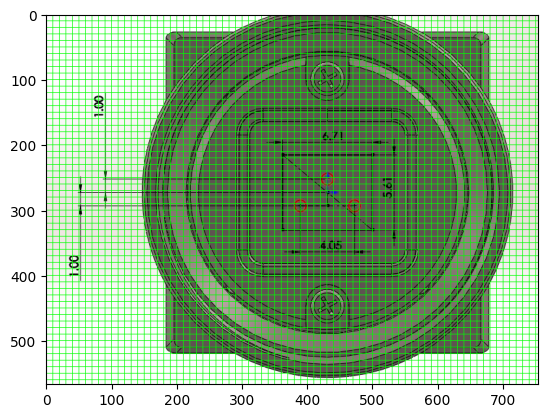

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load image
image = cv2.imread("circle_alignment_reference.jpg")
if image is None:
    print("Error: Image not found.")
    exit()

output = image.copy()

# Set grid spacing (in pixels)
grid_spacing = 10

# Copy image to draw on
grid_image = output.copy()

# Draw vertical grid lines
for x in range(0, output.shape[1], grid_spacing):
    cv2.line(grid_image, (x, 0), (x, output.shape[0]), color=(0, 255, 0), thickness=1)

# Draw horizontal grid lines
for y in range(0, output.shape[0], grid_spacing):
    cv2.line(grid_image, (0, y), (output.shape[1], y), color=(0, 255, 0), thickness=1)

# Display image with grid
plt.imshow(grid_image)

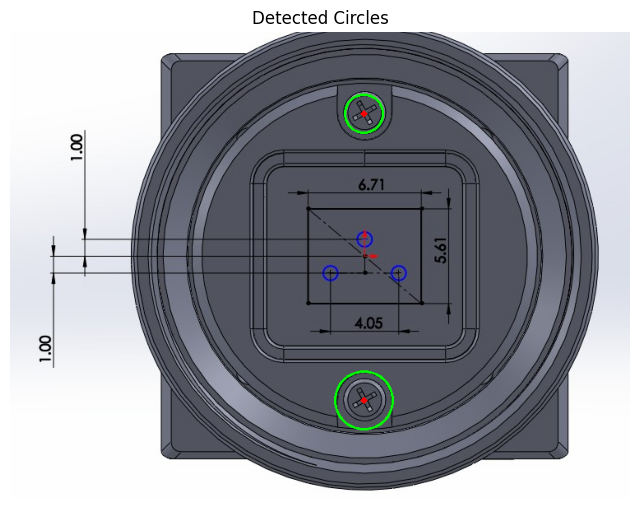

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

clear_output(wait=True)

image = cv2.imread("circle_alignment_reference.jpg")
if image is None:
    print("Error: Image not found.")
else:
    output = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # gray = cv2.GaussianBlur(gray, (7, 7), 2)

    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=10,
                               param1=200, param2=80, minRadius=5, maxRadius=50)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(output, (x, y), r, (0, 255, 0), 2)  # Circle outline
            cv2.circle(output, (x, y), 2, (0, 0, 255), 3)  # Center point

    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(output_rgb)
    plt.title("Detected Circles")
    plt.axis('off')
    plt.show()

Centers: Left=[430 448], Center=[430 100], Right=[430, 300]
Distance between left and right: 148.0


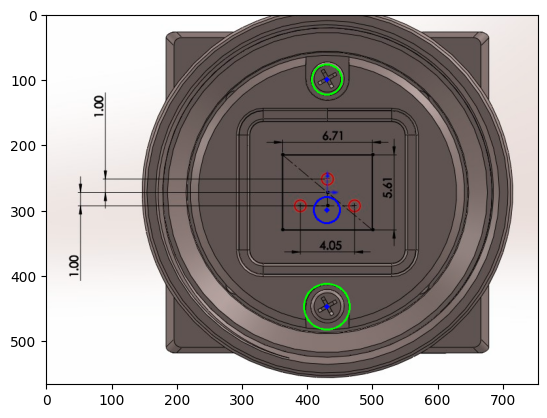

In [29]:
image = cv2.imread("circle_alignment_reference.jpg")
if image is None:
    print("Error: Image not found.")
    exit()

output = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray = cv2.GaussianBlur(gray, (9, 9), 2)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=10,
                           param1=200, param2=80, minRadius=5, maxRadius=50)

default_radius = 20
synthetic_color = (0, 0, 255)  # Blue for synthetic

detected = []

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    circles = sorted(circles, key=lambda c: c[0])  # sort by x
    detected = list(circles[:3])  # limit to 3 if more

# Add synthetic circles if fewer than 3 detected
while len(detected) < 3:
    # Add synthetic at fixed position: e.g., bottom left with offset
    x = 430
    y = 300
    synthetic_circle = [x, y, default_radius]
    detected.append(synthetic_circle)

for i, (x, y, r) in enumerate(detected):
    color = (0, 255, 0) if i < len(circles) else synthetic_color
    cv2.circle(output, (x, y), r, color, 2)
    cv2.circle(output, (x, y), 2, (0, 0, 255), 3)

# Compute distance between left and right
left, center, right = detected[:]
distance = np.linalg.norm(np.array(left[:2]) - np.array(right[:2])) # in pixels

print(f"Centers: Left={left[:2]}, Center={center[:2]}, Right={right[:2]}")
print(f"Distance between left and right: {distance}")

plt.imshow(output)